<h1>AIRCRAFT RISK ANALYSIS</h1>
<h2>Project Overview</h2>
For this project, I will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.
The project aims to determine which aircrafts are the lowest risk, for the company to start their business venture.

<h2>Business Problem</h2>
The company is expanding into new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavour. I must then translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

<h2>Data Source</h2>
This is a dataset from the National Safety Board that includes aviation accident data from 1962-2023 about civil aviation accidents and selected incidents in the United States and International Waters.

In [2]:
#Loading necessary libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing te specific dataset
df = pd.read_csv('AviationData.csv', encoding='windows-1252')

<h2>Understanding the Data</h2>


In [5]:
#Checking for the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
#Checking the columns and rows
df.shape

(88889, 31)

In [7]:
#Understanding the data structure before conducting further analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

<h2>DATA CLEANING USING PANDAS</h2>

This involves checking for missing values, replacing data in specific columns, dropping or adding columns and/or rows, renaming columns and/or rows.

This essentially means fixing the improper data to reduce risk of errors.

In [10]:
#Checking for missing data values per column
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [11]:
#Dropping the columns that will not be of use during the analysis
cols_to_drop = ['Latitude', 'Longitude', 'Schedule','Air.carrier', 'FAR.Description','Registration.Number',
                'Airport.Name', 'Airport.Code', 'Accident.Number', 'Investigation.Type',
               'Number.of.Engines', 'Purpose.of.flight', 'Report.Status', 'Injury.Severity', 'Publication.Date']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [12]:
#Gives null values columnwise
df.isna().sum()

Event.Id                      0
Event.Date                    0
Location                     52
Country                     226
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Engine.Type                7096
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

In [13]:
# Impute numerical data
df['Total.Fatal.Injuries'].fillna(0, inplace=True)
df['Total.Serious.Injuries'].fillna(0, inplace=True)
df['Total.Minor.Injuries'].fillna(0, inplace=True)
df['Total.Uninjured'].fillna(0, inplace=True)

In [14]:
#Combining the columns with different types of injuries into one column
df['Total.Injured'] = df['Total.Fatal.Injuries']+df['Total.Serious.Injuries']+df['Total.Minor.Injuries']

In [15]:
#Dropping the combined columns
cols_to_drop = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [16]:
# Fill missing values for categorical columns
df['Location'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Broad.phase.of.flight'].fillna('Unknown', inplace=True)
df['Weather.Condition'].fillna('Unknown', inplace=True)   
df['Engine.Type'].fillna('Unknown', inplace=True)
df['Aircraft.Category'].fillna('Unknown', inplace=True)
df['Aircraft.damage'].fillna('Unknown', inplace=True)
df['Amateur.Built'].fillna('Unknown', inplace=True)

In [17]:
#Renaming the Unknown columns of the Weather condition column with one name
df['Weather.Condition']= df['Weather.Condition'].replace('Unknown','UNK')
df['Weather.Condition']= df['Weather.Condition'].replace('Unk','UNK')

In [18]:
#Filling the missing values in the Make column
df['Make'].fillna(df['Make'].mode()[0], inplace=True)

In [19]:
#Filling missing values in the Model column
df['Model'] = df.groupby('Make')['Model'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown')

In [20]:
#Confirming if all the missing data is cleaned
df.isna().sum()

Event.Id                 0
Event.Date               0
Location                 0
Country                  0
Aircraft.damage          0
Aircraft.Category        0
Make                     0
Model                    0
Amateur.Built            0
Engine.Type              0
Total.Uninjured          0
Weather.Condition        0
Broad.phase.of.flight    0
Total.Injured            0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Id               88889 non-null  object 
 1   Event.Date             88889 non-null  object 
 2   Location               88889 non-null  object 
 3   Country                88889 non-null  object 
 4   Aircraft.damage        88889 non-null  object 
 5   Aircraft.Category      88889 non-null  object 
 6   Make                   88889 non-null  object 
 7   Model                  88889 non-null  object 
 8   Amateur.Built          88889 non-null  object 
 9   Engine.Type            88889 non-null  object 
 10  Total.Uninjured        88889 non-null  float64
 11  Weather.Condition      88889 non-null  object 
 12  Broad.phase.of.flight  88889 non-null  object 
 13  Total.Injured          88889 non-null  float64
dtypes: float64(2), object(12)
memory usage: 9.5+ MB


<h2>According to the summary statistics:</h2>

The average number of injured persons per aircraft is 1.

The average number of uninjured persons per aircraft is 4.

In [23]:
#Gives Summary Statistics of numerical data
df.describe()

,Total.Uninjured,Total.Injured
count,88889.000000,88889.000000
mean,4.971245,1.114379
std,27.002011,6.027319
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,1.000000
max,699.000000,380.000000


In [24]:
# Save the cleaned dataset
df.to_csv('Cleaned_AviationData.csv')

<h1>DATA ANALYSIS</h1>
<h2>Based on the business problem, here are the key questions we aim to answer:</h2>

1.**Aircraft Safety**: Which aircraft models and makes are associated with the least accidents?

2.**Flight Phases**: During which phases of flight (e.g., takeoff, landing) do most accidents occur?

3.**Weather Conditions**: How does weather influence accident severity?

4.**Geographic Insights**: Are there high-risk locations or countries for aviation incidents?

5.**Engine Type**: Are specific engine types or counts linked to higher accident rates?

6.**Amateur Expertise**: Does the amateur expertise influence the number of accidents?


<h2>Risk Identification By Makes</h2>

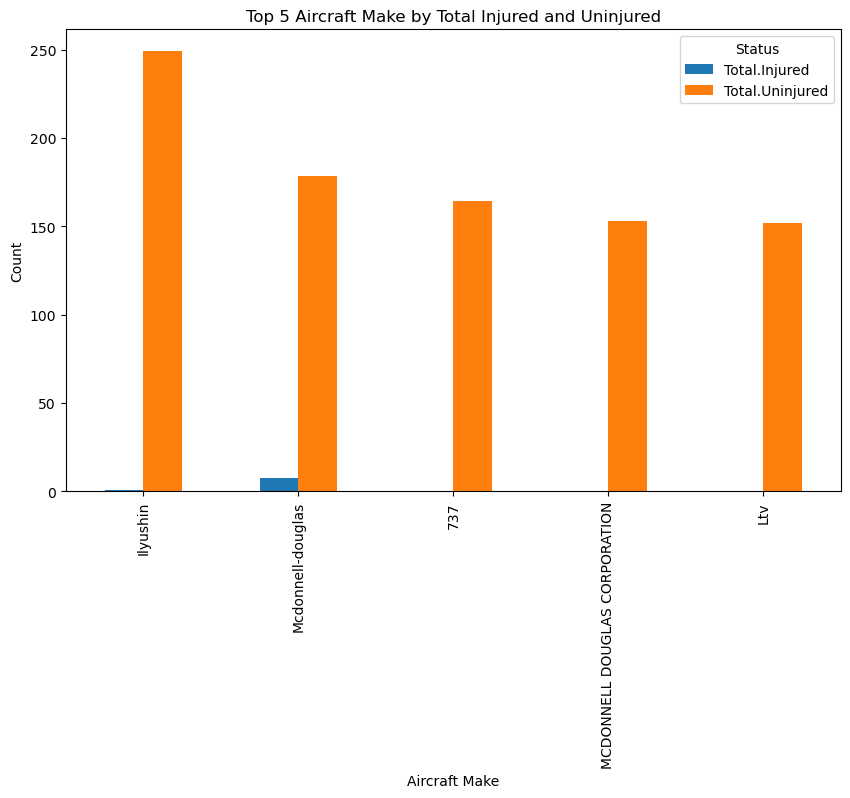

In [77]:
#Grouping by make and calculating the average
avg_grouped=df.groupby('Make')[['Total.Injured','Total.Uninjured']].mean()

#Top 5 makes
top_5_makes=avg_grouped.sort_values(by='Total.Uninjured',ascending=False).head(5)

#Plotting the barchart
ax= top_5_makes.plot(kind='bar', figsize=(10,6))

ax.set_title('Top 5 Aircraft Make by Total Injured and Uninjured')
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Count')
ax.legend(title='Status')

plt.show()
                 

<h2>Risk Identification by Model</h2>

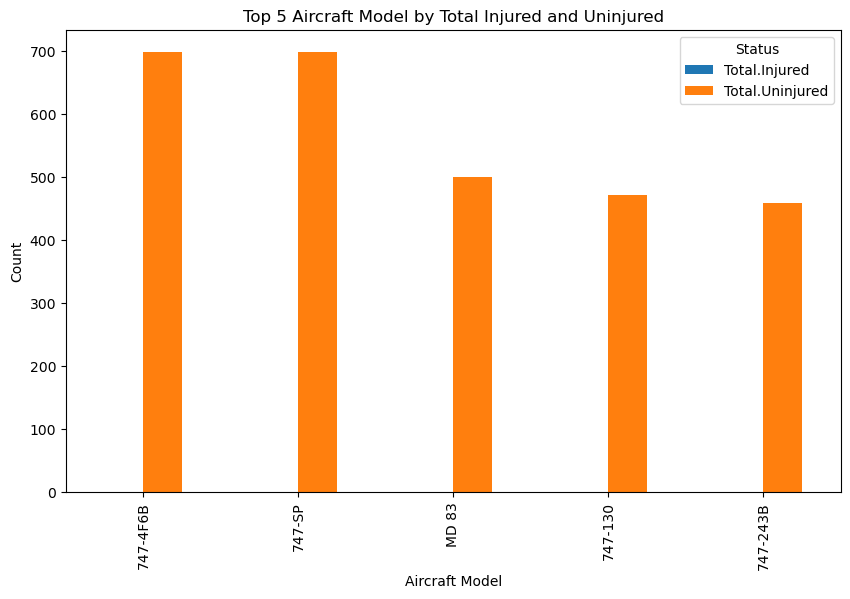

In [79]:
#Grouping by model and calculating the average
avg_grouped=df.groupby('Model')[['Total.Injured','Total.Uninjured']].mean()

#Top 5 makes
top_5_models=avg_grouped.sort_values(by='Total.Uninjured',ascending=False).head(5)

#Plotting the barchart
ax= top_5_models.plot(kind='bar', figsize=(10,6))

ax.set_title('Top 5 Aircraft Model by Total Injured and Uninjured')
ax.set_xlabel('Aircraft Model')
ax.set_ylabel('Count')
ax.legend(title='Status')

plt.show()

<h2>Flight Phases Influencing Accidents</h2>

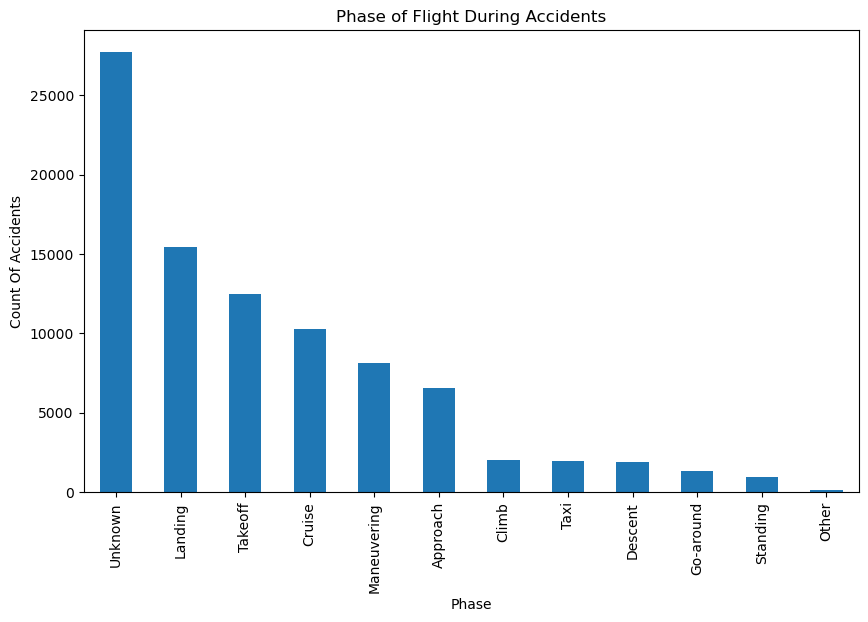

In [92]:

flight_phases = df['Broad.phase.of.flight'].value_counts()

#Plotting the bar chart
ax= flight_phases.plot(kind='bar', figsize=(10, 6),title='Phase of Flight During Accidents')
ax.set_xlabel('Phase')
ax.set_ylabel('Count Of Accidents')
plt.show()

<h2>Weather Conditions Influencing Accidents</h2>

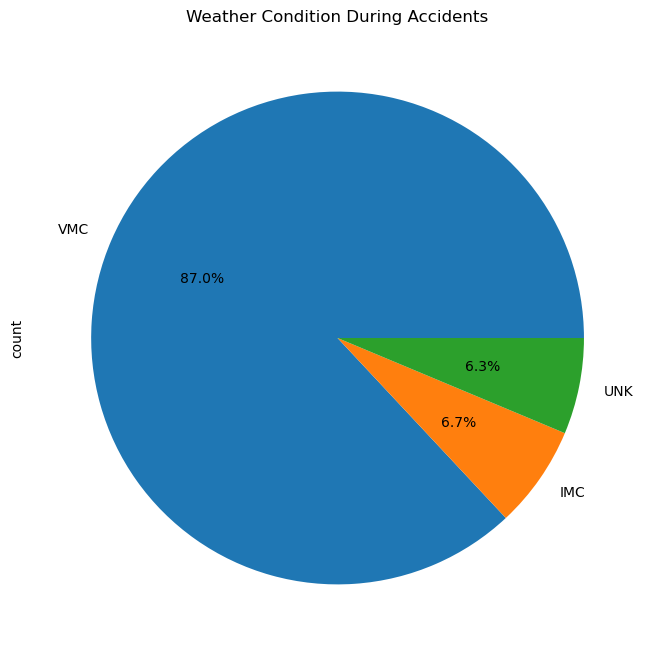

In [94]:
weather_conditions = df['Weather.Condition'].value_counts()

#Plotting a piechart
weather_conditions.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%',title='Weather Condition During Accidents')
ax.set_ylabel('')
plt.show()

<h2>Risk Identification by Countries</h2>

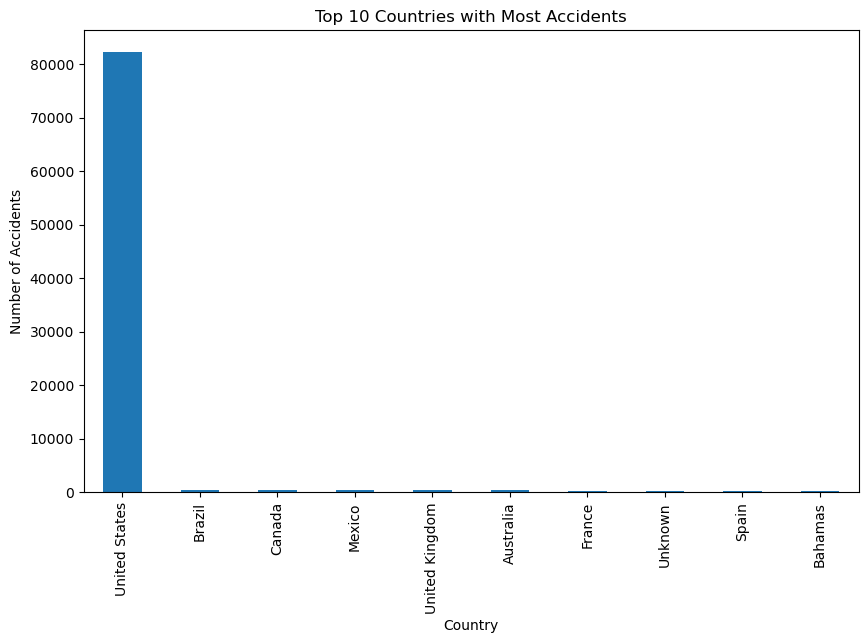

In [96]:

accidents_by_country = df['Country'].value_counts().head(10)

#plotting the bar graph
ax = accidents_by_country.plot(kind='bar', figsize=(10, 6),title='Top 10 Countries with Most Accidents')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Accidents')
plt.show()

<h2>Risk Identification By Engine Types</h2>

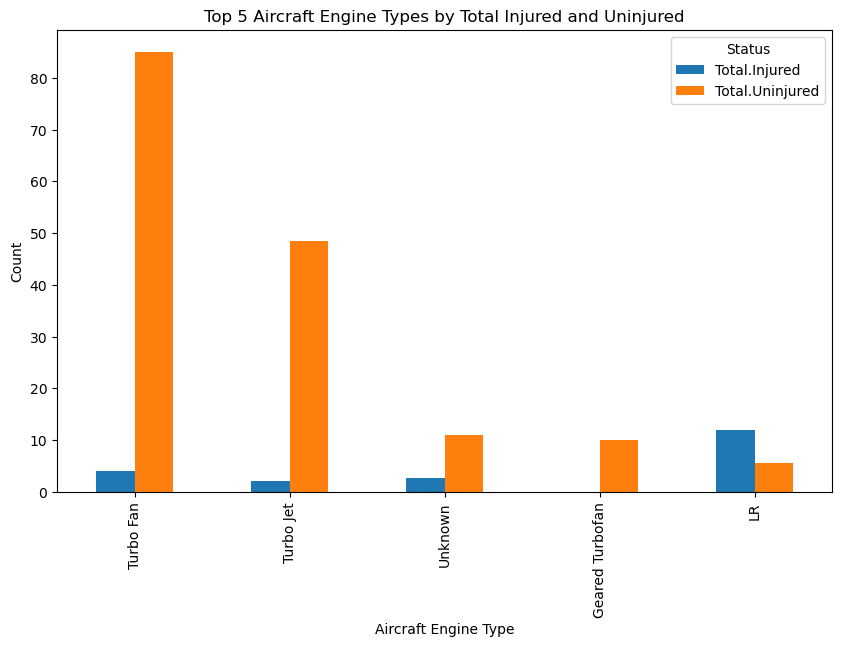

In [100]:
#Grouping by engine type and calculating the average
avg_grouped=df.groupby('Engine.Type')[['Total.Injured','Total.Uninjured']].mean()

#Top 5 engine types
top_5_types=avg_grouped.sort_values(by='Total.Uninjured',ascending=False).head(5)

#Plotting the barchart
ax= top_5_types.plot(kind='bar', figsize=(10,6))

ax.set_title('Top 5 Aircraft Engine Types by Total Injured and Uninjured')
ax.set_xlabel('Aircraft Engine Type')
ax.set_ylabel('Count')
ax.legend(title='Status')

plt.show()

<h2>Risk Identification by Amateurs</h2>

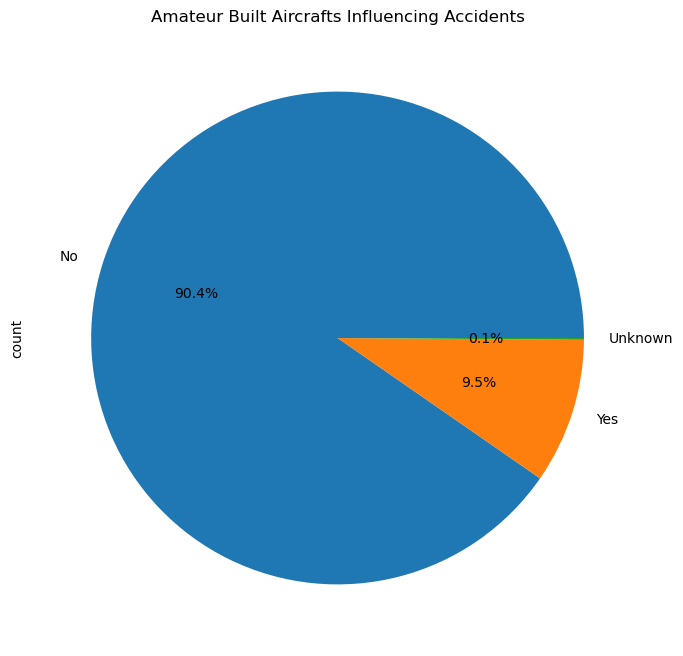

In [113]:
by_amateur_built = df['Amateur.Built'].value_counts()

#Plotting a piechart
by_amateur_built.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%',title='Amateur Built Aircrafts Influencing Accidents')
ax.set_ylabel('')
plt.show()